In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [5]:
import pandas as pd
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

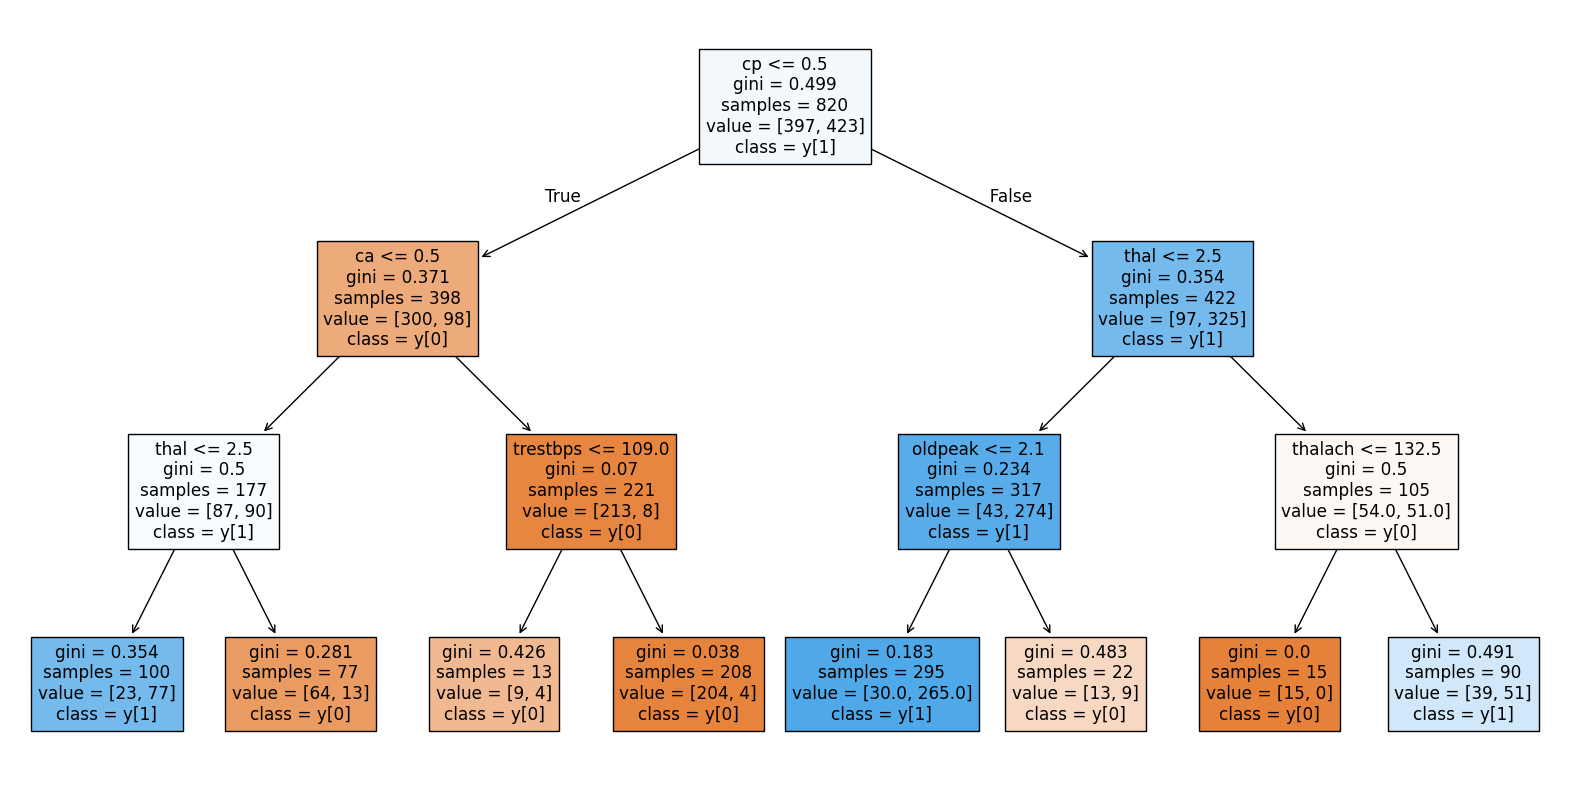

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [12]:
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8512195121951219
Test Accuracy: 0.7804878048780488


In [13]:
for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)
    print(f"Depth: {depth} | Train Acc: {train_acc:.2f} | Test Acc: {test_acc:.2f}")

Depth: 1 | Train Acc: 0.76 | Test Acc: 0.75
Depth: 2 | Train Acc: 0.77 | Test Acc: 0.68
Depth: 3 | Train Acc: 0.85 | Test Acc: 0.78
Depth: 4 | Train Acc: 0.88 | Test Acc: 0.80
Depth: 5 | Train Acc: 0.93 | Test Acc: 0.84
Depth: 6 | Train Acc: 0.95 | Test Acc: 0.88
Depth: 7 | Train Acc: 0.97 | Test Acc: 0.92
Depth: 8 | Train Acc: 0.99 | Test Acc: 0.98
Depth: 9 | Train Acc: 1.00 | Test Acc: 0.98
Depth: 10 | Train Acc: 1.00 | Test Acc: 0.99


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
dtree_acc = dtree.score(X_test, y_test)
rf_acc = rf.score(X_test, y_test)

print("Decision Tree Test Accuracy:", dtree_acc)
print("Random Forest Test Accuracy:", rf_acc)

Decision Tree Test Accuracy: 0.7804878048780488
Random Forest Test Accuracy: 0.9853658536585366


Feature ranking:
1. cp: 0.1351
2. ca: 0.1273
3. thalach: 0.1222
4. oldpeak: 0.1219
5. thal: 0.1105
6. age: 0.0779
7. chol: 0.0748
8. trestbps: 0.0712
9. exang: 0.0576
10. slope: 0.0458
11. sex: 0.0287
12. restecg: 0.0186
13. fbs: 0.0084


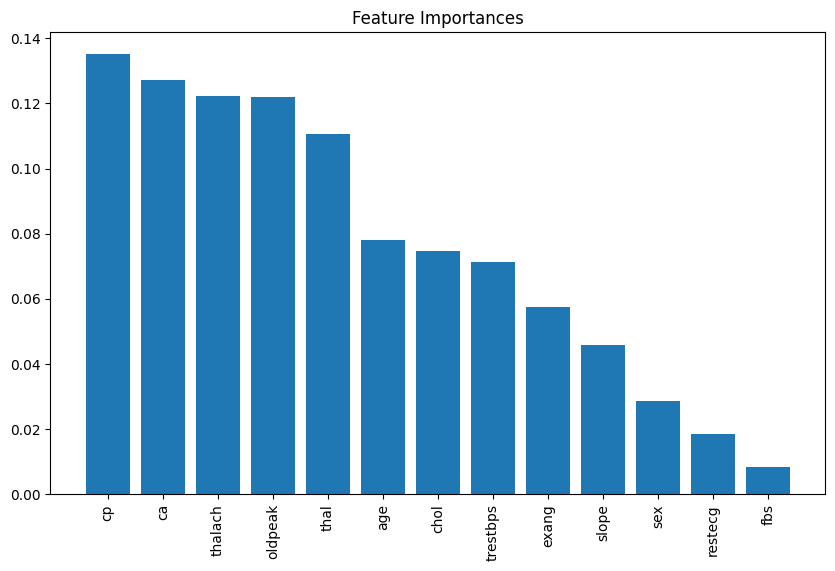

In [15]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV score: 0.9970731707317073
